### REALIZE ANÁLISES EXPLORATÓRIAS NOS DADOS E RESPONDA AS SEGUINTES PERGUNTAS:

1.Qual(s) a(s) companhia(s) que mais registram atrasos? Analise qualitativamente e quantitativamente.


In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Leitura da base de dados
BaseDados = pd.read_csv(
    "data/nycflights.csv",
    index_col=0
    )
BaseDados.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545.0,EWR,IAH,227.0,1400.0,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714.0,LGA,IAH,227.0,1416.0,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141.0,JFK,MIA,160.0,1089.0,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725.0,JFK,BQN,183.0,1576.0,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461.0,LGA,ATL,116.0,762.0,5.0,54.0


### Quais companhias registram mais operações?

In [ ]:
print('--- Total de Voos por Cia ---')
top_companhias = BaseDados['carrier'].value_counts().nlargest(5)

print(top_companhias)

--- Total de Voos por Cia ---
carrier
UA    42109
B6    38775
EV    38742
DL    34261
AA    23445
Name: count, dtype: int64


### Quem registra mais atrasos?

In [ ]:
# Criando filtro
filtros_atraso = BaseDados['dep_delay'] > 0
# Aplicando filtro (subset)
voos_atrasados = BaseDados[filtros_atraso]
# Conta quem aparece mais
print('--- Top 5 Companhias com Mais Atrasos ---')
print(voos_atrasados['carrier'].value_counts().head())

--- Top 5 Companhias com Mais Atrasos ---
carrier
UA    19253
EV    17179
B6    14594
DL    10126
AA     7223
Name: count, dtype: int64


### Qual companhia tem a pior qualidade?

In [11]:
# Total de voos por companhia
total_voos = BaseDados['carrier'].value_counts()

# Total de voos com atraso
total_atrasos = voos_atrasados['carrier'].value_counts()

# Calculando a porcentagem (Atrasos / Total)
taxa_atraso = (total_atrasos / total_voos) * 100

# Ordenando do maior para o menor
print('--- Ranking de Piores (Porcentagem de Atraso) ---')
print(taxa_atraso.sort_values(ascending=False).head())

--- Ranking de Piores (Porcentagem de Atraso) ---
carrier
OO    57.142857
WN    50.920664
FL    49.040067
UA    45.721817
EV    44.342058
Name: count, dtype: float64


### 🔎 Análise de Confiabilidade: Volume vs. Taxa de Atraso

**A Hipótese:**
Observamos que a **United Airlines (UA)** possui o maior volume de voos (42.109) e, consequentemente, o maior número absoluto de atrasos (19.253). Mas será que isso a torna a "pior" companhia?

**A Metodologia:**
Para evitar o **Viés de Volume** (Volume Bias), criamos uma nova métrica: a **Taxa de Atraso (Delay Rate)**.
> *Cálculo: (Total de Atrasos / Total de Voos) * 100*

**O Insight:**
Ao normalizar os dados, a história muda:
* **SkyWest (OO):** Revelou-se a menos confiável, com uma taxa de atraso de **57%**. Ou seja, é mais provável atrasar do que sair no horário.
* **United (UA):** Caiu para a 4ª posição no ranking de ineficiência, com uma taxa de **45%**.

**Conclusão:**
Embora a United atrase mais em números brutos porque tem mais aviões no céu, a SkyWest apresenta um risco proporcionalmente maior de atraso.

### Gráfico taxa de atraso

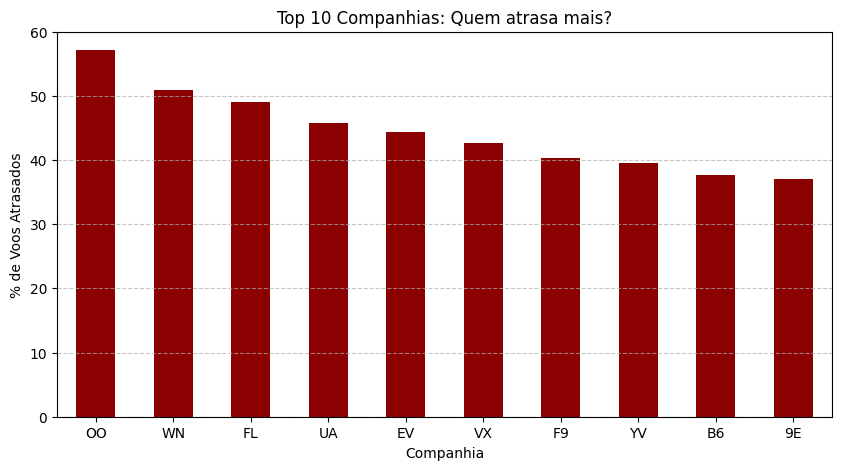

In [12]:
# pegando top 10 piores taxas de atraso
top_10_piores = taxa_atraso.sort_values(ascending=False).head(10)

# Criar gráfico
top_10_piores.plot(kind='bar', figsize=(10, 5), color='darkred')

# Configurar Titulo e Eixos
plt.title('Top 10 Companhias: Quem atrasa mais?')
plt.xlabel('Companhia')
plt.ylabel('% de Voos Atrasados')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### O Fator Sazonalidade

Pergunta de Negócio: "Existe uma melhor época do ano para viajar? Os atrasos pioram no inverno ou no verão?"

In [13]:
# Agrupar por mês e tirar a média de atrasos
sazonalidade = BaseDados.groupby('month')['dep_delay'].mean()

# Mostrar do maior atraso para o menor
print('--- Ranking dos Piores Meses (Média de Atraso em Minutos) ---')
print(sazonalidade.sort_values(ascending=False))

--- Ranking dos Piores Meses (Média de Atraso em Minutos) ---
month
12    16.576688
6     16.213634
4     13.938038
3     13.227076
5     12.986859
2     10.816843
1     10.036665
10     6.243988
11     5.435362
Name: dep_delay, dtype: float64


### 🗓️ Análise de Sazonalidade: O Melhor e o Pior Momento para Voar

**Padrão Identificado:**
Ao agrupar a média de atrasos por mês, identificamos uma **Sazonalidade Clara** influenciada por férias e clima.

**Os Picos (Alta Temporada):**
* **Dezembro (Mês 12):** Com maior média de **16.5 minutos** de atraso.
    * *Fatores:* Inverno (neve/gelo) + Alto tráfego de festas (Natal/Ano Novo).
* **Junho (Mês 6):** Praticamente empatado, com **16.2 minutos**.
    * *Fatores:* Início do Verão, férias escolares.

**O Vale (Melhor Época):**
* **Outubro (10) e Novembro (11):** Durante o Outono, observamos uma queda drástica nos atrasos (chegando a 5 min em Nov).
    * *Insight:* É a "Baixa Temporada", clima estável e menor demanda antes do feriado de Ação de Graças.

**Conclusão:**
Para evitar atrasos, evite os extremos do calendário (meio e fim de ano). O Outono se mostrou a estação mais confiável.

### Gráfico da Sazonalidade

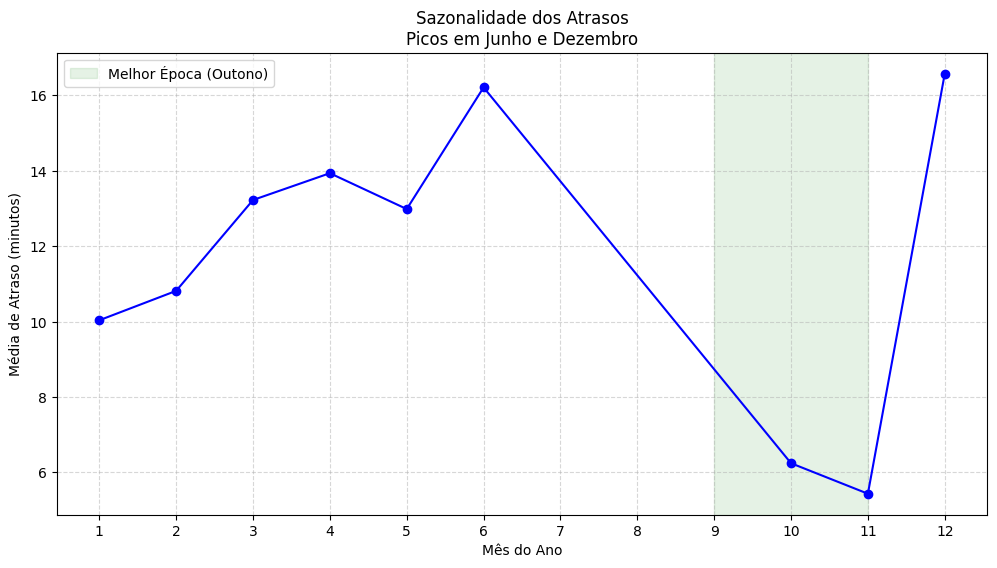

In [16]:
# Agrupar por mês cronologicamente (1 à 12)
sazonalidade_cronologica = BaseDados.groupby('month')['dep_delay'].mean()

# Plotar a linha do tempo
plt.figure(figsize=(12, 6))
plt.plot(sazonalidade_cronologica.index, sazonalidade_cronologica.values, marker='o', linestyle='-', color='b')

# Titulos
plt.title('Sazonalidade dos Atrasos\nPicos em Junho e Dezembro')
plt.xlabel('Mês do Ano')
plt.ylabel('Média de Atraso (minutos)')
plt.grid(True, linestyle='--', alpha=0.5)

# Forçando eixo X mostrar todos os meses
plt.xticks(range(1,13))

# Destacando "Melhor Época"
plt.axvspan(9, 11, color='green', alpha=0.1, label='Melhor Época (Outono)')
plt.legend()

plt.show()


### Qual aeroporto mais tem atrasos

Pergunta de Negócio: "Existe um aeroporto que trava mais que os outros? A estrutura do aeroporto impacta o atraso?"

In [17]:
# Agrupar por aeroporto de origem e calcular a média de atraso
aeroportos = BaseDados.groupby('origin')['dep_delay'].mean()

# Order modo decrescente
print('--- Ranking de Aeroportos (Média de Atraso em Minutos) ---')
print(aeroportos.sort_values(ascending=False))

--- Ranking de Aeroportos (Média de Atraso em Minutos) ---
origin
EWR    14.632799
JFK    10.388404
LGA     9.205128
Name: dep_delay, dtype: float64


### 🛫 Análise de Infraestrutura: Qual Aeroporto de Origem Evitar?

**Os Dados:**
Ao agrupar a média de atrasos (`dep_delay`) por aeroporto de origem (`origin`), descobrimos:

1.  **EWR (Newark):** Apresentou o maior valor, com média de **14.6 minutos** de atraso por voo.
2.  **JFK (Kennedy):** Ficou em segundo lugar, com **10.4 minutos**.
3.  **LGA (LaGuardia):** Mostrou-se a opção mais eficiente com comprometimento de pontualidade, com **9.2 minutos**.

**Conclusão Prática:**
Se o passageiro tiver flexibilidade de escolha e o destino permitir, voar saindo de **LaGuardia (LGA)** oferece estatisticamente uma menor chance de atraso na partida.

### Gráfico Aeroporto com maior tempo de atraso

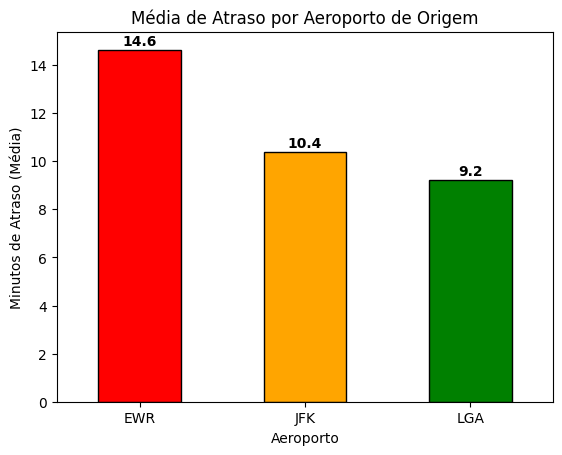

In [19]:
# Dados
aeroportos = BaseDados.groupby('origin')['dep_delay'].mean().sort_values(ascending=False)

# Definindo cores
cores = ['red','orange','green']

# Plotar
plt.Figure(figsize=(8,5))
aeroportos.plot(kind='bar', color=cores, edgecolor='black')

# Titulo
plt.title('Média de Atraso por Aeroporto de Origem')
plt.xlabel('Aeroporto')
plt.ylabel('Minutos de Atraso (Média)')
plt.xticks(rotation=0)

# Adiciona os valores em cima das barras
for index, value in enumerate(aeroportos):
    plt.text(index, value + 0.2, str(round(value, 1)), ha='center', fontweight='bold')

plt.show()